<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(0_8)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_0.8_n250.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,98.931520,91.927212,67.880233,39.321037,6.965791,315.025793,306.967946,8.057847
1,0.0,1.0,33.472435,66.728744,65.319569,23.329431,1.512819,200.362998,198.538309,1.824688
2,0.0,2.0,70.198132,80.267632,51.442311,80.401572,-4.380720,287.928926,290.970219,-3.041292
3,0.0,3.0,56.048435,39.848154,37.540756,81.316742,-3.365666,221.388421,224.365963,-2.977541
4,0.0,4.0,72.063772,65.461167,23.739015,59.062963,-6.328839,223.998079,229.493584,-5.495505
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,99.429982,25.131061,68.950879,23.544499,-1.725843,225.330578,228.092951,-2.762372
59996,999.0,56.0,75.963900,64.329427,92.470329,65.209517,0.398908,308.372081,309.323540,-0.951459
59997,999.0,57.0,61.577858,94.816356,73.958219,38.566956,-2.437712,276.481678,278.257118,-1.775440
59998,999.0,58.0,49.757933,89.544879,95.353596,56.029493,-0.944056,299.741844,300.526444,-0.784600


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,98.931520,91.927212,67.880233,39.321037,6.965791,315.025793,306.967946,8.057847
1,0.0,1.0,33.472435,66.728744,65.319569,23.329431,1.512819,200.362998,198.538309,1.824688
2,0.0,2.0,70.198132,80.267632,51.442311,80.401572,-4.380720,287.928926,290.970219,-3.041292
3,0.0,3.0,56.048435,39.848154,37.540756,81.316742,-3.365666,221.388421,224.365963,-2.977541
4,0.0,4.0,72.063772,65.461167,23.739015,59.062963,-6.328839,223.998079,229.493584,-5.495505
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,99.429982,25.131061,68.950879,23.544499,-1.725843,225.330578,228.092951,-2.762372
59996,999.0,56.0,75.963900,64.329427,92.470329,65.209517,0.398908,308.372081,309.323540,-0.951459
59997,999.0,57.0,61.577858,94.816356,73.958219,38.566956,-2.437712,276.481678,278.257118,-1.775440
59998,999.0,58.0,49.757933,89.544879,95.353596,56.029493,-0.944056,299.741844,300.526444,-0.784600


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    98.931520  91.927212  67.880233  39.321037  6.965791  315.025793   
      1.0    33.472435  66.728744  65.319569  23.329431  1.512819  200.362998   
      2.0    70.198132  80.267632  51.442311  80.401572 -4.380720  287.928926   
      3.0    56.048435  39.848154  37.540756  81.316742 -3.365666  221.388421   
      4.0    72.063772  65.461167  23.739015  59.062963 -6.328839  223.998079   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   99.429982  25.131061  68.950879  23.544499 -1.725843  225.330578   
      56.0   75.963900  64.329427  92.470329  65.209517  0.398908  308.372081   
      57.0   61.577858  94.816356  73.958219  38.566956 -2.437712  276.481678   
      58.0   49.757933  89.544879  95.353596  56.029493 -0.944056  299.741844   
      59.0   60.755958  32.632816  61.278316  20.710460  6.994863  192.372413   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    306.967946  8.057847  
      1.0    198.538309  1.824688  
      2.0    290.970219 -3.041292  
      3.0    224.365963 -2.977541  
      4.0    229.493584 -5.495505  
...                 ...       ...  
999.0 55.0   228.092951 -2.762372  
      56.0   309.323540 -0.951459  
      57.0   278.257118 -1.775440  
      58.0   300.526444 -0.784600  
      59.0   185.278787  7.093626  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    98.931520  91.927212  67.880233  39.321037  6.965791  315.025793   
      1.0    33.472435  66.728744  65.319569  23.329431  1.512819  200.362998   
      2.0    70.198132  80.267632  51.442311  80.401572 -4.380720  287.928926   
      3.0    56.048435  39.848154  37.540756  81.316742 -3.365666  221.388421   
      4.0    72.063772  65.461167  23.739015  59.062963 -6.328839  223.998079   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   99.429982  25.131061  68.950879  23.544499 -1.725843  225.330578   
      56.0   75.963900  64.329427  92.470329  65.209517  0.398908  308.372081   
      57.0   61.577858  94.816356  73.958219  38.566956 -2.437712  276.481678   
      58.0   49.757933  89.544879  95.353596  56.029493 -0.944056  299.741844   
      59.0   60.755958  32.632816  61.278316  20.710460  6.994863  192.372413   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    306.967946  8.057847  
      1.0    198.538309  1.824688  
      2.0    290.970219 -3.041292  
      3.0    224.365963 -2.977541  
      4.0    229.493584 -5.495505  
...                 ...       ...  
999.0 55.0   228.092951 -2.762372  
      56.0   309.323540 -0.951459  
      57.0   278.257118 -1.775440  
      58.0   300.526444 -0.784600  
      59.0   185.278787  7.093626  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,98.931520,91.927212,67.880233,39.321037,6.965791,315.025793,306.967946,8.057847
1,0.0,1.0,33.472435,66.728744,65.319569,23.329431,1.512819,200.362998,198.538309,1.824688
2,0.0,2.0,70.198132,80.267632,51.442311,80.401572,-4.380720,287.928926,290.970219,-3.041292
3,0.0,3.0,56.048435,39.848154,37.540756,81.316742,-3.365666,221.388421,224.365963,-2.977541
4,0.0,4.0,72.063772,65.461167,23.739015,59.062963,-6.328839,223.998079,229.493584,-5.495505
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,99.429982,25.131061,68.950879,23.544499,-1.725843,225.330578,228.092951,-2.762372
59996,999.0,56.0,75.963900,64.329427,92.470329,65.209517,0.398908,308.372081,309.323540,-0.951459
59997,999.0,57.0,61.577858,94.816356,73.958219,38.566956,-2.437712,276.481678,278.257118,-1.775440
59998,999.0,58.0,49.757933,89.544879,95.353596,56.029493,-0.944056,299.741844,300.526444,-0.784600


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    98.931520  91.927212  67.880233  39.321037  6.965791  315.025793   
      1.0    33.472435  66.728744  65.319569  23.329431  1.512819  200.362998   
      2.0    70.198132  80.267632  51.442311  80.401572 -4.380720  287.928926   
      3.0    56.048435  39.848154  37.540756  81.316742 -3.365666  221.388421   
      4.0    72.063772  65.461167  23.739015  59.062963 -6.328839  223.998079   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   99.429982  25.131061  68.950879  23.544499 -1.725843  225.330578   
      56.0   75.963900  64.329427  92.470329  65.209517  0.398908  308.372081   
      57.0   61.577858  94.816356  73.958219  38.566956 -2.437712  276.481678   
      58.0   49.757933  89.544879  95.353596  56.029493 -0.944056  299.741844   
      59.0   60.755958  32.632816  61.278316  20.710460  6.994863  192.372413   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    306.967946  8.057847  
      1.0    198.538309  1.824688  
      2.0    290.970219 -3.041292  
      3.0    224.365963 -2.977541  
      4.0    229.493584 -5.495505  
...                 ...       ...  
999.0 55.0   228.092951 -2.762372  
      56.0   309.323540 -0.951459  
      57.0   278.257118 -1.775440  
      58.0   300.526444 -0.784600  
      59.0   185.278787  7.093626  

[60000 rows x 8 columns]

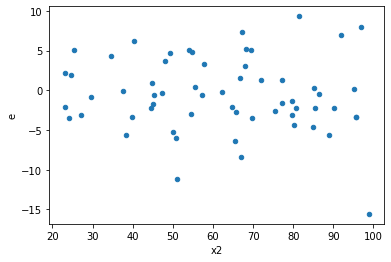

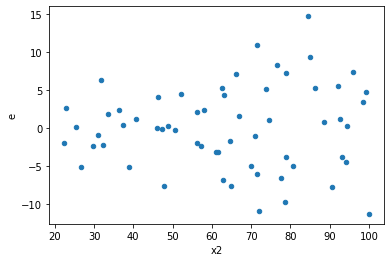

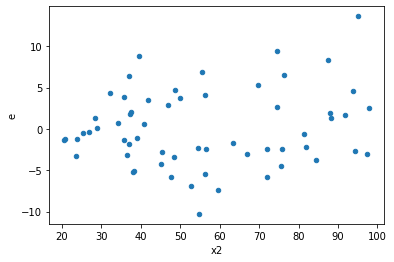

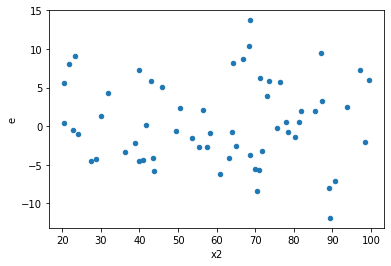

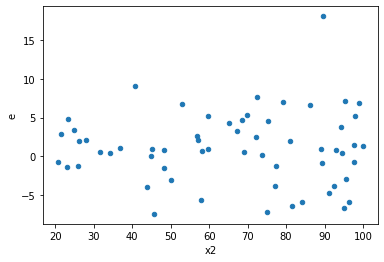

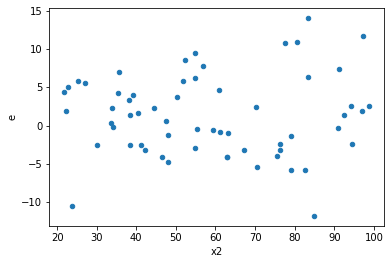

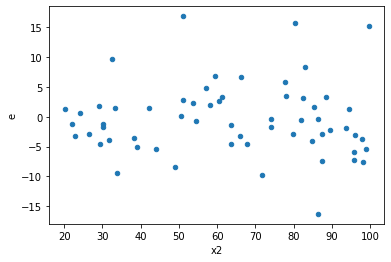

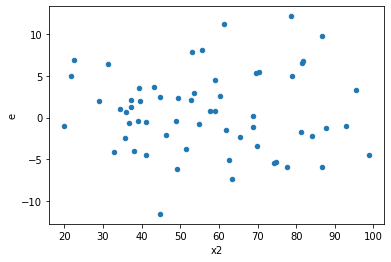

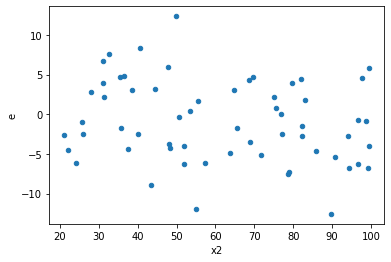

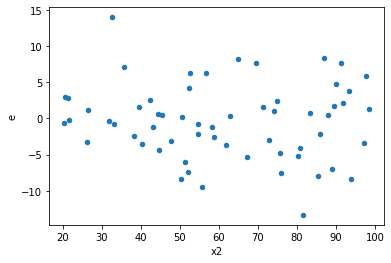

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,20.0,20.0,453.1437052546029,597.494991968378,22.657185262730145,29.8747495984189,1.3185552067476476,0.5420472256920261,0.7289763871539869,0.27102361284601306,Reject005=1 : Homoscedasticity
1.0,20.0,20.0,417.6985308462785,769.4760159495822,20.884926542313927,38.473800797479115,1.8421803265397765,0.1805652613890365,0.9097173693054817,0.09028263069451825,Reject005=1 : Homoscedasticity
2.0,20.0,20.0,271.5553101261099,552.5995918905115,13.577765506305493,27.629979594525576,2.0349430531624852,0.12040244726509086,0.9397987763674546,0.06020122363254543,Reject005=1 : Homoscedasticity
3.0,20.0,20.0,528.9472170696351,540.2280900804203,26.447360853481758,27.011404504021016,1.021327029704932,0.9628312978653069,0.5185843510673466,0.48141564893265343,Reject005=1 : Homoscedasticity
4.0,20.0,20.0,304.8968341220768,563.7977860393266,15.244841706103841,28.189889301966332,1.8491428015732991,0.17792850645734237,0.9110357467713288,0.08896425322867119,Reject005=1 : Homoscedasticity
5.0,20.0,20.0,460.79398560602596,686.7551094222847,23.0396992803013,34.337755471114235,1.4903734225590632,0.3797746000417992,0.8101126999791004,0.1898873000208996,Reject005=1 : Homoscedasticity
7.0,20.0,20.0,376.3375978632641,481.68002228381823,18.816879893163204,24.08400111419091,1.279914696322286,0.5862252731465833,0.7068873634267083,0.2931126365732917,Reject005=1 : Homoscedasticity
8.0,20.0,20.0,317.73972709845884,540.6416949870928,15.886986354922943,27.03208474935464,1.7015237594748822,0.243189273349665,0.8784053633251675,0.1215946366748325,Reject005=1 : Homoscedasticity
10.0,20.0,20.0,456.0421682389043,527.787777296874,22.802108411945216,26.3893888648437,1.157322313712851,0.7470653352615666,0.6264673323692167,0.3735326676307833,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,453.1437052546029,597.494991968378,22.657185262730145,29.8747495984189,1.3185552067476476,0.5420472256920261,Reject005=1 : Homoscedasticity
1.0,20.0,20.0,417.6985308462785,769.4760159495822,20.884926542313927,38.473800797479115,1.8421803265397765,0.1805652613890365,Reject005=1 : Homoscedasticity
2.0,20.0,20.0,271.5553101261099,552.5995918905115,13.577765506305493,27.629979594525576,2.0349430531624852,0.12040244726509086,Reject005=1 : Homoscedasticity
3.0,20.0,20.0,528.9472170696351,540.2280900804203,26.447360853481758,27.011404504021016,1.021327029704932,0.9628312978653069,Reject005=1 : Homoscedasticity
4.0,20.0,20.0,304.8968341220768,563.7977860393266,15.244841706103841,28.189889301966332,1.8491428015732991,0.17792850645734237,Reject005=1 : Homoscedasticity
5.0,20.0,20.0,460.79398560602596,686.7551094222847,23.0396992803013,34.337755471114235,1.4903734225590632,0.3797746000417992,Reject005=1 : Homoscedasticity
6.0,20.0,20.0,853.7923706172226,791.7598978288506,42.689618530861125,39.587994891442534,0.9273447796874463,0.867722210567468,Reject005=1 : Homoscedasticity
7.0,20.0,20.0,376.3375978632641,481.68002228381823,18.816879893163204,24.08400111419091,1.279914696322286,0.5862252731465833,Reject005=1 : Homoscedasticity
8.0,20.0,20.0,317.73972709845884,540.6416949870928,15.886986354922943,27.03208474935464,1.7015237594748822,0.243189273349665,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      903
Reject005=0 : Heteroscedasticity     97
Name: Result_test, dtype: int64